# Loading data from online DB: PANGAEA

APIs for [PANGAEA](https://www.pangaea.de/): https://www.pangaea.de/tools/

Documentation for `pangaeapy`: https://github.com/pangaea-data-publisher/pangaeapy

In [ ]:
%%bash
pip -q install pangaeapy

In [1]:
import pangaeapy as pan
# use pangaeapy-functions via pan

## Loading

In [2]:
pangaea_id = '10.1594/PANGAEA.734969'
pangaea_id = '10.1594/PANGAEA.846345'

In [3]:
# have a quick look into the raw file:
# link: https://doi.pangaea.de/10.1594/PANGAEA.846345

In [4]:
# load data from pangaea
pangaea_data = pan.PanDataSet(pangaea_id)
pangaea_data.title

'Temperature measurements from mooring KPO_1047'

## Examining

In [5]:
pangaea_data.data

,Date/Time,Depth water,Temp
0,2009-10-31 20:00:00,775.9,5.54
1,2009-10-31 22:00:00,775.7,5.53
2,2009-11-01 00:00:00,775.8,5.53
3,2009-11-01 02:00:00,776.2,5.53
4,2009-11-01 04:00:00,776.4,5.48
...,...,...,...
6722,2011-05-15 00:00:00,773.1,5.50
6723,2011-05-15 02:00:00,773.4,5.47
6724,2011-05-15 04:00:00,774.2,5.51
6725,2011-05-15 06:00:00,774.1,5.52


In [6]:
for ev in pangaea_data.events:
    print(ev.label)

MSM18/2_618-1


In [7]:
# show statistics
pangaea_data.data.describe()

,Depth water,Temp
count,6727.000000,6727.000000
mean,774.273584,5.431640
std,0.746539,0.101308
min,772.500000,5.050000
25%,773.700000,5.370000
50%,774.200000,5.440000
75%,774.800000,5.500000
max,778.000000,5.900000


<AxesSubplot:>

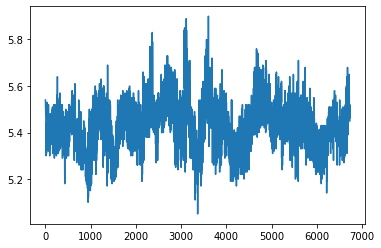

In [8]:
# plot data
#pangaea_data.data.plot()
pangaea_data.data.Temp.plot()
#pangaea_data.data['Depth water'].plot()

## How do I get the Pangaea-ID?

one way:

- go to pangaea.de
- search for data you are interested in
- copy the IDs to a csv-file
- load the csv into python

...


another way:

use the R-package provided for Pangaea-Access: https://docs.ropensci.org/pangaear/ **in PYTHON (!!!!)** with `rpy2`

**INFO**: you need to have R installed on your laptop!

In [9]:
# activate %%R magic
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("pangaear", repos="http://cran.us.r-project.org", quiet=TRUE)
library(pangaear, quiet=TRUE)

In [11]:
%%R -o entries
entries = pg_search(query = 'Temperature measurements from mooring KPO_1047')
entries = pg_search(query = 'SFB754', count = 500)

In [12]:
entries

,score,doi,size,size_measure,citation,supplement_to
1,30.231436,10.1594/PANGAEA.903913,33.0,datasets,"Burmeister, K; Lübbecke, J; Brandt, P et al. (...",NA_character_
2,25.928877,10.1594/PANGAEA.918915,8.0,datasets,"Stenvers, V; Hauss, H; Freitas, R et al. (2020...",NA_character_
3,25.928877,10.1594/PANGAEA.918339,10.0,datasets,"Dale, A; Treude, T (2020): Nutrients in sedime...",NA_character_
4,25.928877,10.1594/PANGAEA.924375,2.0,datasets,"Kiko, R (2020): The global marine particle siz...",NA_character_
5,25.867130,10.1594/PANGAEA.900929,2.0,datasets,"Loginova, A; Engel, A (2019): Dissolved organi...","Loginova, A; Thomsen, S; Dengler, M et al. (20..."
...,...,...,...,...,...,...
496,9.568721,10.1594/PANGAEA.923485,100.0,data points,"Sommer, S; Dale, A (2020): Particulate geochem...",NA_character_
497,9.568721,10.1594/PANGAEA.923502,109.0,data points,"Sommer, S; Dale, A (2020): Particulate geochem...",NA_character_
498,9.568721,10.1594/PANGAEA.922540,130.0,data points,"Sommer, S; Dale, A (2020): Particulate geochem...",NA_character_
499,9.568721,10.1594/PANGAEA.922541,60.0,data points,"Sommer, S; Dale, A (2020): Particulate geochem...",NA_character_


In [13]:
entries.doi

1      10.1594/PANGAEA.903913
2      10.1594/PANGAEA.918915
3      10.1594/PANGAEA.918339
4      10.1594/PANGAEA.924375
5      10.1594/PANGAEA.900929
                ...          
496    10.1594/PANGAEA.923485
497    10.1594/PANGAEA.923502
498    10.1594/PANGAEA.922540
499    10.1594/PANGAEA.922541
500    10.1594/PANGAEA.867633
Name: doi, Length: 500, dtype: object

In [14]:
pangaea_data = pan.PanDataSet(entries.doi[0])
pangaea_data.title

'Ventilation of the eastern tropical North Atlantic by intraseasonal flow events of the North Equatorial Undercurrent'

In [15]:
pangaea_data.authors[0].lastname

'Burmeister'

In [16]:
pangaea_data.authors[0].firstname

'Kristin'

In [17]:
pangaea_data.authors[0].ORCID

'0000-0003-3881-0298'

In [18]:
for author in pangaea_data.authors:
    print(author.lastname)
    print(author.firstname)
    print(author.ORCID)
    print("")

Burmeister
Kristin
0000-0003-3881-0298

Lübbecke
Joke
0000-0002-7839-3284

Brandt
Peter
0000-0002-9235-955X

Claus
Martin
0000-0002-7525-5134

Hahn
Johannes
0000-0002-5638-2031



### Advanced Data Loading from Pangaea

the following command does not show anything... why?

In [19]:
pangaea_data.data

""


the first entry in `entries`is a `dataset` instead of `data points`


A `dataset` is a collection of other `dataset`s or `data points`

In [20]:
entries.size_measure[0]

'datasets'

let's have a R-supported look at what this means (for a small `dataset`) 

In [ ]:
%%R -i entries
pg_data(entries$doi[5])

quick fix: only select `data points`

In [22]:
entries_datapoints = entries[entries["size_measure"] == "data points"]
entries_datapoints

,score,doi,size,size_measure,citation,supplement_to
6,25.315649,10.1594/PANGAEA.919740,97.0,data points,"Glock, N (2020): I/Ca ratios in recent benthic...",NA_character_
16,23.219350,10.1594/PANGAEA.919761,1681.0,data points,"Glock, N (2020): I/Ca, N/Ca and S/Ca ratios in...",NA_character_
24,21.908241,10.1594/PANGAEA.919742,196.0,data points,"Glock, N (2020): Individual I/Ca ratios in rec...",NA_character_
63,16.382425,10.1594/PANGAEA.877387,4.0,data points,"Krahmann, G; Dengler, M; Thomsen, S et al. (20...",NA_character_
64,16.246304,10.1594/PANGAEA.877392,4.0,data points,"Krahmann, G; Dengler, M; Thomsen, S et al. (20...",NA_character_
...,...,...,...,...,...,...
496,9.568721,10.1594/PANGAEA.923485,100.0,data points,"Sommer, S; Dale, A (2020): Particulate geochem...",NA_character_
497,9.568721,10.1594/PANGAEA.923502,109.0,data points,"Sommer, S; Dale, A (2020): Particulate geochem...",NA_character_
498,9.568721,10.1594/PANGAEA.922540,130.0,data points,"Sommer, S; Dale, A (2020): Particulate geochem...",NA_character_
499,9.568721,10.1594/PANGAEA.922541,60.0,data points,"Sommer, S; Dale, A (2020): Particulate geochem...",NA_character_


In [23]:
pangaea_data = pan.PanDataSet(entries_datapoints.doi[0])
pangaea_data.title

'I/Ca ratios in recent benthic foraminifera from the Peruvian OMZ (Q-ICP-MS data)'

In [24]:
for author in pangaea_data.authors:
    print(author.lastname)
    print(author.firstname)
    print(author.ORCID)
    print("")

Glock
Nicolaas
None



In [25]:
pangaea_data.data

,Event,Latitude,Longitude,Elevation,Sample label,Species,n,I/Ca,Uncertainty,Precip,O2
0,M77/1_406-1,-17.4667,-71.8732,-491,M77-1 406/MUC-06,P. limbata,1,2.20,NaN,1.28,25.2
1,M77/1_455-1,-11.0000,-78.3207,-466,M77-1 455/MUC-21,U. striata,6,0.32,7.19,4.09,2.4
2,M77/1_455-1,-11.0000,-78.3207,-466,M77-1 455/MUC-21,H. elegans,8,0.19,34.57,6.78,2.4
3,M77/1_459-1,-11.0005,-78.4268,-697,M77-1 459/MUC-25,U. peregrina,1,0.48,NaN,3.55,12.6
4,M77/1_459-1,-11.0005,-78.4268,-697,M77-1 459/MUC-25,U. striata,1,0.91,NaN,2.35,12.6
5,M77/1_487-1,-11.0000,-78.3862,-580,M77-1 487/MUC-38,U. striata,12,0.43,6.86,2.51,3.7
6,M77/1_487-1,-11.0000,-78.3862,-580,M77-1 487/MUC-38,P. limbata,5,1.32,22.80,1.67,3.7
7,M77/1_487-1,-11.0000,-78.3862,-580,M77-1 487/MUC-38,H. elegans,9,0.13,4.89,6.34,3.7
8,M77/1_516-1,-11.0000,-78.3487,-512,M77-1 516/MUC-40,U. striata,1,0.57,NaN,3.13,2.4
9,M77/1_553-1,-10.4397,-78.9122,-522,M77-1 553/MUC-54,P. limbata,1,1.34,NaN,1.99,3.0
